In [1]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
import MDAnalysis
import urllib.request
import yaml
from scipy.interpolate import interpn
import pandas as pd
import seaborn as sn
import scipy
import scipy.signal

sys.path.insert(1, '../../Databank/Scripts/BuildDatabank/')
from databankLibrary import download_link, lipids_dict, databank

path = '../../Databank/Data/Simulations/'
db_data = databank(path)
systems = db_data.get_systems()

def plotFF(FormFactor, color, linewidth):
    x = []
    y= []
    for i in FormFactor:
        x.append(i[0])
        y.append(i[1])
    plt.plot(x,y,color = color, linewidth = linewidth)

1024
1024
256
256
64
64
64
256
64
256
256
1024
1024
1024
64
1024
256
64


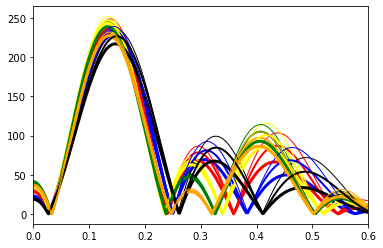

In [18]:
colors = {0: 'black', 0.25: 'red', 0.125: 'blue', 0.625: 'green', 0.40625: 'yellow', 0.875:'orange'}
widths = {64: 1, 256: 2, 1024: 3}

for system in systems:
    FormFactorPath = system['path'] + 'FormFactor.json'
    try: 
        f = open(FormFactorPath)
    except:
        continue
    FormFactor = json.load(f)
    #print(system)
    #try:
        #if 'Javanainen' in system['AUTHORS_CONTACT'] and 'CHOL' in system['COMPOSITION'].keys()  and 'POPC' in system['COMPOSITION'].keys():
    if '10.5281/zenodo.5767451' in system['DOI']:
        try:
            Nchol = np.sum(system['COMPOSITION']['CHOL']['COUNT'])
        except:
            Nchol = 0
        Npopc = np.sum(system['COMPOSITION']['POPC']['COUNT'])
        ratio = Nchol/Npopc
        print(Npopc)
        plotFF(FormFactor, colors[ratio], widths[Npopc])
        #print(FFmins)
            #print(system['COMPOSITION'])
            #print(system['TEMPERATURE'])
            #print(FormFactor)       
    ##except:
    #  continue
    #plt.show()
    plt.xlim([0,0.6])


[0.141, 0.307, 0.464, 0.467, 0.565, 0.598, 0.602, 0.607, 0.615, 0.628, 0.633, 0.636, 0.638, 0.641, 0.645, 0.658, 0.667, 0.672, 0.675, 0.684, 0.688, 0.69, 0.695, 0.699, 0.712, 0.717, 0.721, 0.723, 0.73, 0.734, 0.738, 0.743, 0.754, 0.769, 0.772, 0.775, 0.777, 0.779, 0.781, 0.794]


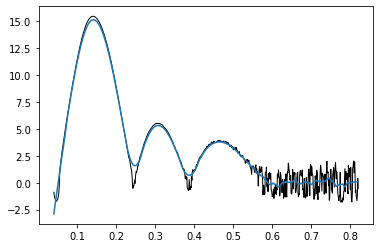

In [2]:
#path = '../../Databank/Data/experiments/FormFactors/10.1021/jp511159q/1/POPE_ULV_35Cin0D_FormFactor.json'
path = '../../Databank/Data/experiments/FormFactors/10.1039/C4SM00066H/1/POPS_ULV_25Cin0D_SHE_FormFactor.json'
f = open(path)
FormFactor = json.load(f)
plotFF(FormFactor, 'black', 1)

FFtmp = []
FFx = []
for i in FormFactor:
    FFtmp.append(i[1])
    FFx.append(i[0])

    
#n = 30  # the larger n is, the smoother curve will be
#b = [1.0 / n] * n
#a = 1
#w = scipy.signal.lfilter(b,a,FFtmp)

w = scipy.signal.savgol_filter(FFtmp, 41, 1)

#fs = 30 
#sos = scipy.signal.iirfilter(1, Wn=[0.1, 2.5], fs=fs, btype="bandpass",ftype="butter", output="sos")
#w = scipy.signal.sosfilt(sos, FFtmp)

plt.plot(FFx,w)

#peak_ind = scipy.signal.find_peaks(w)
peak_ind = scipy.signal.find_peaks(w)

#print(FormFactor, FFtmp, w, peak_ind[0])
    
minX = []
for i in peak_ind[0]:
    #print(i)
    minX.append(FormFactor[i][0])

print(minX)

In [33]:
w

array([-6.14506719e-01, -6.51837301e-01, -6.89001670e-01, -7.25999825e-01,
       -7.62831768e-01, -7.99497498e-01, -8.35997014e-01, -8.72330318e-01,
       -9.08497409e-01, -9.44498287e-01, -9.80332952e-01, -1.01574603e+00,
       -1.05174881e+00, -1.08721442e+00, -1.12214413e+00, -1.15696953e+00,
       -1.19181337e+00, -1.22665626e+00, -1.26086829e+00, -1.29500219e+00,
       -1.32850281e+00, -1.36163616e+00, -1.39478228e+00, -1.42761556e+00,
       -1.46013436e+00, -1.49268977e+00, -1.52432265e+00, -1.55575221e+00,
       -1.58676561e+00, -1.61717293e+00, -1.64765021e+00, -1.67759137e+00,
       -1.70711180e+00, -1.73631873e+00, -1.76483949e+00, -1.79286237e+00,
       -1.82055149e+00, -1.84778261e+00, -1.87495521e+00, -1.90151095e+00,
       -1.92753645e+00, -1.95355737e+00, -1.97880222e+00, -2.00350768e+00,
       -2.02743609e+00, -2.05056914e+00, -2.07324681e+00, -2.09592579e+00,
       -2.11815789e+00, -2.13965806e+00, -2.16028016e+00, -2.18026839e+00,
       -2.19982151e+00, -